In [46]:
# (16-726): Project 1 starter Python code
# credit to https://inst.eecs.berkeley.edu/~cs194-26/fa18/hw/proj1/data/colorize_skel.py
# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import skimage.transform
import os


In [18]:
skio.use_plugin('matplotlib', 'imshow')


# The following plug-ins are available:

# ========== ==============================================================
# Plugin     Description
# ---------- --------------------------------------------------------------
# qt         Fast image display using the Qt library. Deprecated since
#            0.18. Will be removed in 0.20.
# imread     Image reading and writing via imread
# gdal       Image reading via the GDAL Library (www.gdal.org)
# simpleitk  Image reading and writing via SimpleITK
# gtk        Fast image display using the GTK library
# pil        Image reading via the Python Imaging Library
# fits       FITS image reading via PyFITS
# matplotlib Display or save images using Matplotlib
# tifffile   Load and save TIFF and TIFF-based images using tifffile.py
# imageio    Image reading via the ImageIO Library
# ========== ==============================================================()

In [37]:

# name of the input file
imname = 'data/emir.tif'

# read in the image
im = skio.imread(imname)

def get_channels(im):
    # convert to double (might want to do this later on to save memory)
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int64)

    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    return r,g,b
r,g,b = get_channels(im)


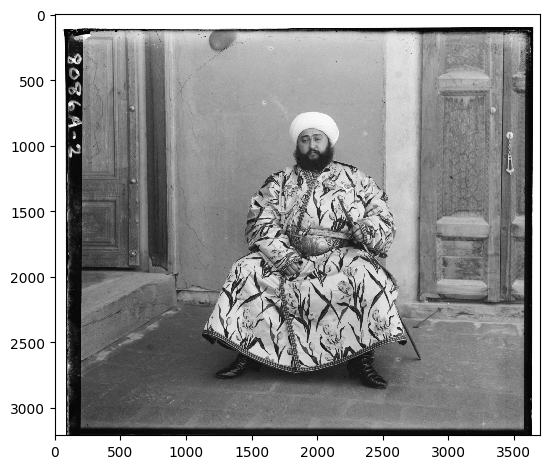

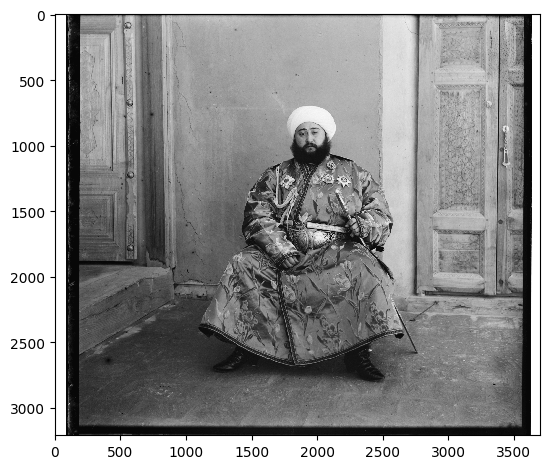

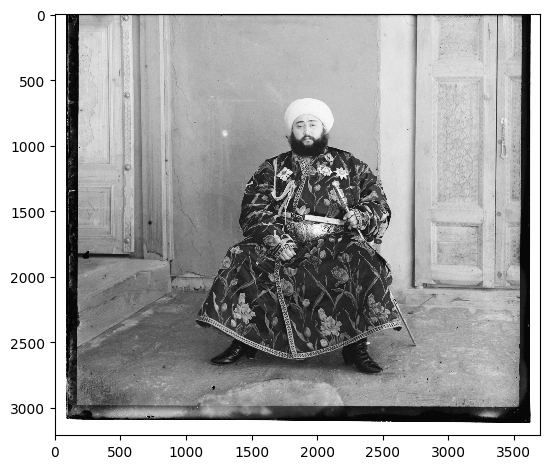

In [38]:
for channel in (b,g,r):
    skio.imshow(channel)
    skio.show()

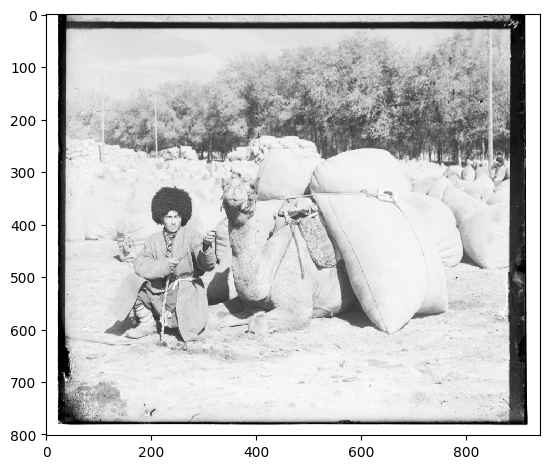

In [52]:
skio.imshow(sk.transform.rescale(r, 1/4))

In [34]:
# aligning, stacking, post_processing algorithms
def dumb_stack(r,g,b):
    return np.dstack([r, g, b])
def ssd_brute_force(r,g,b):
    """
    Align channels by minimizing sum of squared differences.
    L2 norm also known as the Sum of Squared Differences (SSD) distance 
    which is simply sum(sum((image1-image2).^2)) 
    where the sum is taken over the pixel values.

    Args:
        r (np.ndarray): channel that is not aligned with the other two
        g (np.ndarray): channel that is not aligned with the other two
        b (np.ndarray): channel that is not aligned with the other two
    """


    ag = align(g, b)
    ar = align(r, b)
    return np.dstack([ar, ag, b])

im_out = dumb_stack(r,g,b)


In [32]:

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

### ag = align(g, b)
### ar = align(r, b)
# create a color image
# im_out = np.dstack([ar, ag, b])


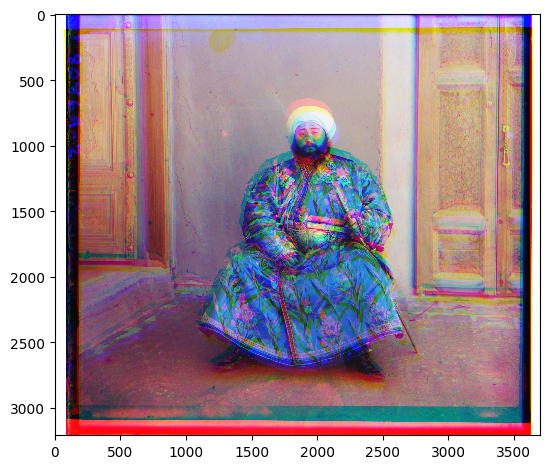

In [33]:
# save the image
fname = 'output/emir_dumb.jpg'
skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()


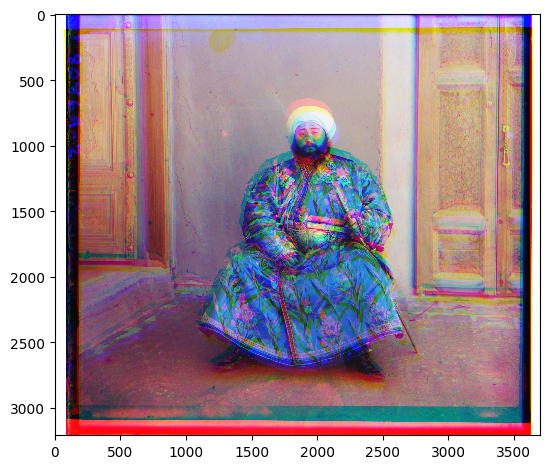

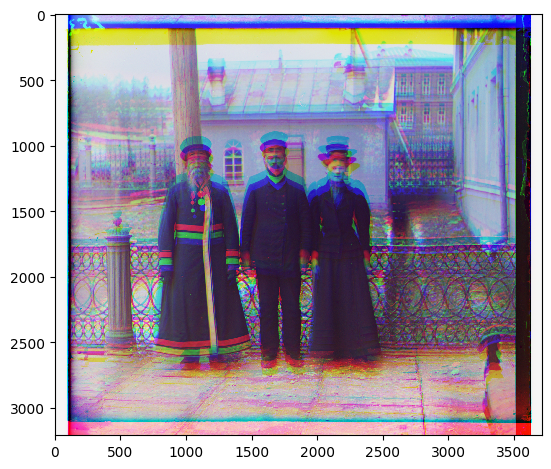

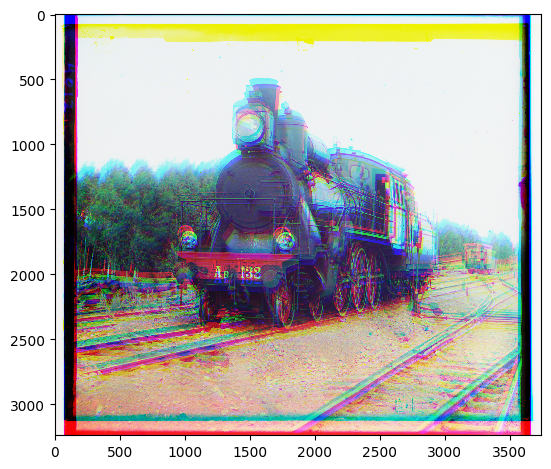

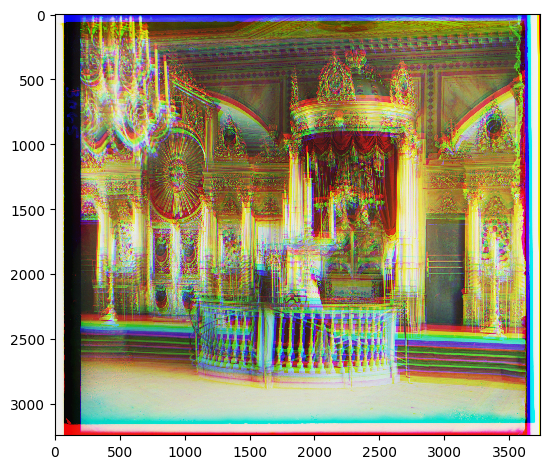

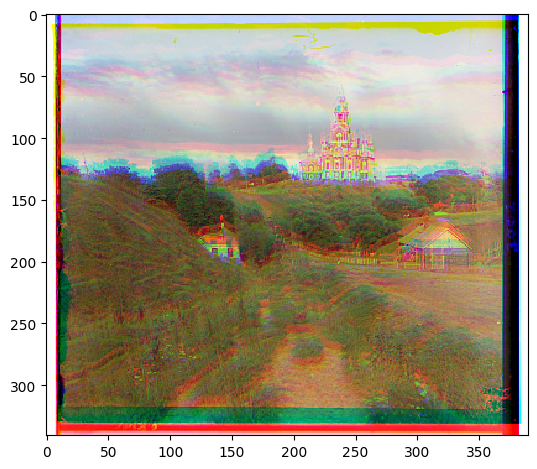

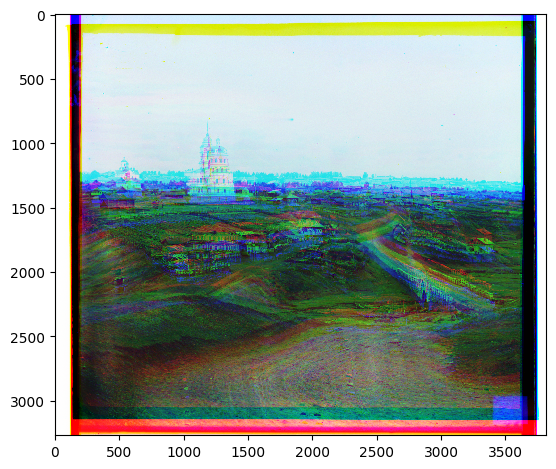

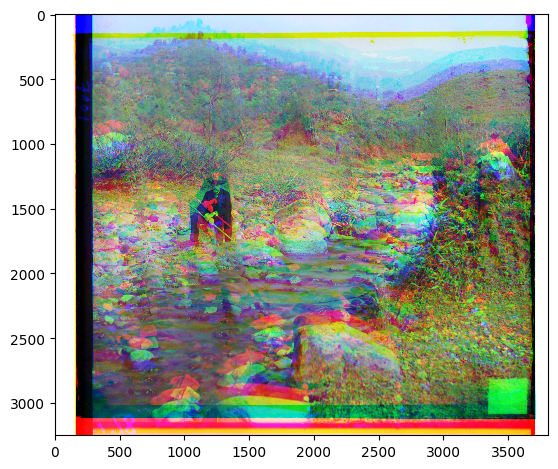

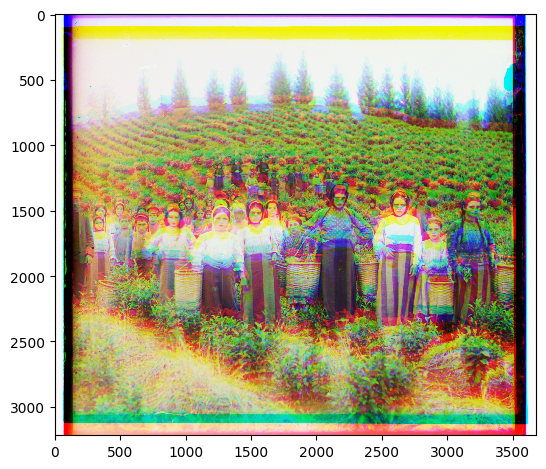

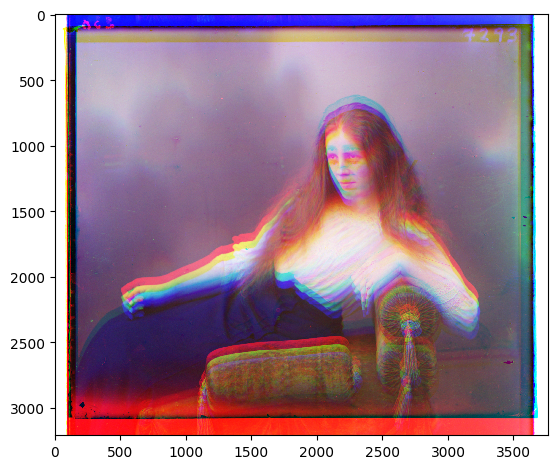

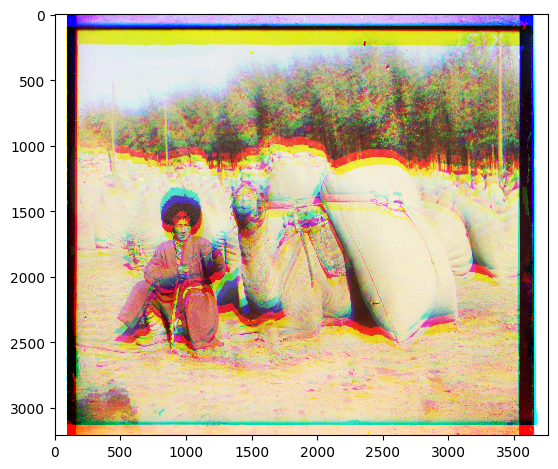

In [44]:
stack_algo = dumb_stack
output_file_prefix = 'dumb'

for imfname in os.listdir('data'):
    # name of the input file
    impath = f'data/{imfname}'
    imtitle = os.path.splitext(imfname)[0]
    # print(imtitle)

    # read in the image
    im = skio.imread(impath)
    r,g,b = get_channels(im)

    # align and stack
    im_out = stack_algo(r,g,b)

    # save the image
    output_dir = f'output/{output_file_prefix}/'
    if not os.path.isdir(output_dir):
        os.makedir(output_dir)
    fname = os.path.join(output_dir, f'{imtitle}.jpg')

    skio.imsave(fname, im_out)

    # display the image
    skio.imshow(im_out)
    skio.show()